### 1. Duomenų įsikėlimas


In [147]:
import pandas as pd

# df = pd.read_table("bike-sharing.csv", sep=",", header=0)
df = pd.read_csv('./Data.txt', sep=" ", decimal='.')
# df = df[df['workingday'] >= 1]

df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
1,107,1687,867,269,9059,0.102972,12,0
2,97,1508,825,265,7685,0.102363,6,0
3,102,1507,806,319,9963,0.102062,12,0
4,87,1385,814,407,10955,0.100873,8,0
5,119,1632,991,454,11823,0.101020,10,0
...,...,...,...,...,...,...,...,...
188,96,1284,644,521,21626,0.114797,5,1
189,122,1444,643,429,20195,0.114093,7,1
190,120,1575,641,408,19928,0.116466,7,1
191,137,1737,711,490,18564,0.116026,4,1


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 192
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriversKilled  192 non-null    int64  
 1   drivers        192 non-null    int64  
 2   front          192 non-null    int64  
 3   rear           192 non-null    int64  
 4   kms            192 non-null    int64  
 5   PetrolPrice    192 non-null    float64
 6   VanKilled      192 non-null    int64  
 7   law            192 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 13.5 KB


In [149]:
df.describe()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,122.802083,1670.307292,837.218750,401.208333,14993.604167,0.103624,9.057292,0.119792
std,25.379886,289.610958,175.098967,83.102210,2938.049207,0.012176,3.636903,0.325567
min,60.000000,1057.000000,426.000000,224.000000,7685.000000,0.081179,2.000000,0.000000
25%,104.750000,1461.750000,715.500000,344.750000,12685.000000,0.092577,6.000000,0.000000
50%,118.500000,1631.000000,828.500000,401.500000,14987.000000,0.104477,8.000000,0.000000
75%,138.000000,1850.750000,950.750000,456.250000,17202.500000,0.114056,12.000000,0.000000
max,198.000000,2654.000000,1299.000000,646.000000,21626.000000,0.133027,17.000000,1.000000


In [150]:
new_df = df.drop(['law'], axis=1)

<Axes: >

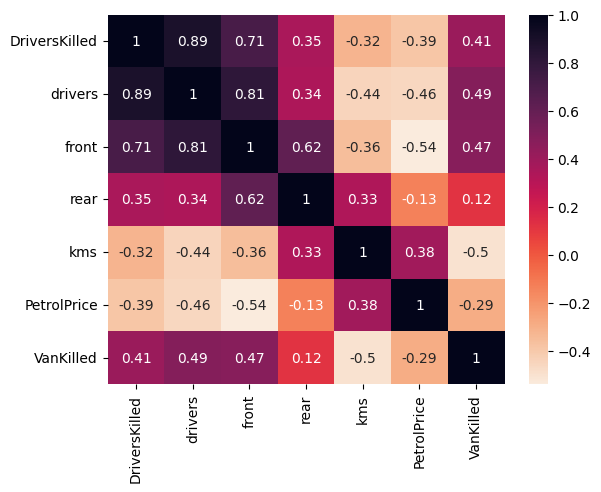

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

correlation_matrix = new_df.corr()

sns.heatmap(correlation_matrix ,
annot=True,cmap="rocket_r")

Kadangi rear su vankilled ir petrolprice nekoreliuoja išmetame rear. Kadangi 0 arčiausiai.

In [152]:
new = new_df.drop(['rear'], axis=1)

new.head()

,DriversKilled,drivers,front,kms,PetrolPrice,VanKilled
1,107,1687,867,9059,0.102972,12
2,97,1508,825,7685,0.102363,6
3,102,1507,806,9963,0.102062,12
4,87,1385,814,10955,0.100873,8
5,119,1632,991,11823,0.101020,10


In [161]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_trans = new.select_dtypes(include=['float64','int64'])

data_scaler = StandardScaler()
dfs_transformed = data_scaler.fit_transform(df_trans)

chi_square_value, p_value = calculate_bartlett_sphericity(dfs_transformed)

print("Chi-square value:", chi_square_value)
print("P-value:", p_value)

Chi-square value: 700.2405268706345
P-value: 1.652325445586614e-139


Kadangi 𝑝 − 𝑟𝑒𝑖𝑘š𝑚ė = 1.652325445586614e-139 < 0,05, tai galima teigti, kad stebimi kintamieji
tarpusavyje koreliuoja.

### 2. KMO skaičiavimas

In [154]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo


kmo_all, kmo_model = calculate_kmo(new)

print(f"KMO bendra reikšmė: {kmo_model}")

KMO bendra reikšmė: 0.7606912136237041


KMO matas svyruoja nuo 0 iki 1, kur reikšmė artima 1 rodo, kad faktorinė analizė yra tinkama, o reikšmė mažesnė nei 0.5 rodo, kad faktorinė analizė gali būti netinkama.

KMO > 0.5 

0.76 > 0.5

KMO = 0,76 – vadinasi stebimi duomenys faktorinei analizei tinka
patenkinamai;

### 3. MSA skaičiavimas

In [155]:
print("MSA reikšmė kiekvienam kintamajam:")

print()

for column, kmo in zip(new.columns, kmo_all):
    print(f"{column}: {round(kmo, 2)}")


MSA reikšmė kiekvienam kintamajam:

DriversKilled: 0.73
drivers: 0.7
front: 0.81
kms: 0.72
PetrolPrice: 0.83
VanKilled: 0.85


Vadinasi visi stebimi kintamieji tinka faktorinei analizei, nes visos 𝑀𝑆𝐴𝑖 > 0,5

### 4. Rasti kovariacijų matricos tikrinius vektorius ir tikrines reikšmes

In [156]:
new.head()

,DriversKilled,drivers,front,kms,PetrolPrice,VanKilled
1,107,1687,867,9059,0.102972,12
2,97,1508,825,7685,0.102363,6
3,102,1507,806,9963,0.102062,12
4,87,1385,814,10955,0.100873,8
5,119,1632,991,11823,0.101020,10


In [163]:
import numpy as np

cov_matrix = np.cov(dfs_transformed, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print("Kovariacijų matricos tikrinės reikšmės:")
print(eigen_values)

print("Kovariacijų matricos tikriniai vektoriai:")
print(eigen_vectors)

Kovariacijų matricos tikrinės reikšmės:
[3.56851871 0.91455797 0.08450404 0.72212628 0.2606325  0.48107412]
Kovariacijų matricos tikriniai vektoriai:
[[-0.44747659 -0.39646082  0.54973809 -0.21921027 -0.49459109 -0.21839885]
 [-0.48798763 -0.26723031 -0.78949317 -0.15935054 -0.06573816 -0.19350055]
 [-0.46218078 -0.24910202  0.24934481  0.05455618  0.79210255  0.1782174 ]
 [ 0.32660508 -0.6841242  -0.10729695 -0.03160174 -0.13017983  0.62916222]
 [ 0.3422249  -0.08455782  0.02805171 -0.85691203  0.27953304 -0.25001649]
 [-0.35246693  0.48392046 -0.00402348 -0.43391357 -0.16895615  0.6517244 ]]


### 5. Apskaičiuotos pagrindinių komponenčių dispersijas

In [168]:
for i in eigen_values:
    print(round(i, 4))

3.5685
0.9146
0.0845
0.7221
0.2606
0.4811


Pagrindinių komponenčių dispersijos yra:
3.56851871 0.91455797 0.08450404 0.72212628 0.2606325  0.48107412

In [169]:
# Skaičiuojame proporcingą dispersiją
variance_proportion = eigen_values / np.sum(eigen_values)

# Skaičiuojame kumuliatyvų proporcingą dispersiją
cumulative_variance_proportion = np.cumsum(variance_proportion)

# Spausdiname rezultatus
print("Standard deviation", np.sqrt(eigen_values))
print("Proportion of Variance", variance_proportion)
print("Cumulative Proportion", cumulative_variance_proportion)

Standard deviation [1.88905233 0.95632524 0.29069579 0.84978014 0.51052179 0.69359507]
Proportion of Variance [0.59165545 0.15163244 0.01401065 0.11972753 0.04321251 0.07976142]
Cumulative Proportion [0.59165545 0.74328789 0.75729854 0.87702607 0.92023858 1.        ]
